In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def year_change(year):
    '''
    function to convert one and two digit years into four digits
    '''
    if len(year)==1:
        year='200'+ year
    else:
        year='20'+year

    return year

In [3]:
# import the Vancouver Police Department's most recent data, available every Sunday.
# this will be automated in the next iteration of this project
df=pd.read_csv('/Users/michaeljoyce/Desktop/Capstone/data/crime_csv_all_years.csv',parse_dates={'dttime':[1,2,3]}, keep_date_col=True)
# dttime added for the next step which is gatherind day of the week data

# make a copy of the original data to keep an original dataframe intact
df_temp=df.copy()

# add day of the week to original data
df_temp['day_of_week']=df_temp['dttime'].dt.weekday_name

# remove missing data, all (or nearly all) of which is the non-property crime data
# non-property crime data lacks all address information due to privacy concerns
df2=df_temp.dropna()



# rename columns as all caps is tedious to work with
df3=df2.rename(index=str, columns={"YEAR": "year", "MONTH": "month", "DAY":"day","HOUR":"hour",
                               "MINUTE":"minute", "NEIGHBOURHOOD":"neighborhood"})


# sort by date
df4=df3.sort_values(['year','month','day','hour','minute'])

# remove extraneous data
df5=df4.drop(['minute', 'HUNDRED_BLOCK','TYPE'], axis=1)

# change all possible values to numeric form
df6=df5.apply(pd.to_numeric, errors='ignore')

# bin by 1200am-1159am, 1200pm -1159pm
hourbins = [-0.1,12.0,24.1]
hourlabels = ['1200am-1159am', '1200pm-1159pm']
# group by neighborhood, by day_segment
df6['day_segment'] = pd.cut(df6["hour"], bins=hourbins,labels=hourlabels)

# remove extraneous data
df7=df6[['year', 'month', 'day', 'day_of_week','day_segment', 'neighborhood']]

# group by neighborhood, by day_segment
df8=df7.groupby(df7.columns.tolist()).size()
df9=pd.DataFrame(df8).reset_index()
df10=df9.rename(index=str, columns={ 0 :"number_of_crimes"})
# make final copy for merging

# remove outlier of 499 crimes due to 2011 Stanley Cup riot
df11=df10.loc[df10['number_of_crimes']!=df10['number_of_crimes'].max()]

# remove second outlier of 104 crimes due to unknown reason
df12=df11.loc[df11['number_of_crimes']!=df11['number_of_crimes'].max()]


df_final=df12.copy()

In [4]:
wdf=pd.read_csv('/Users/michaeljoyce/Desktop/Capstone/data/BA_weather_data.csv')

# make a copy of the original data to keep an original dataframe intact
wdf2=wdf.copy()

# remove extraneous data
wdf3=wdf2[['DATE', 'TMAX', 'TMIN']]

# rename columns as all caps is tedious to work with
wdf4=wdf3.rename(index=str, columns={ "DATE":"date", "TMAX":"tmax","TMIN":"tmin"})

# extract data from wdf3 in a more usable form
wdf4['year'] = wdf4.date.str.split('/').str.get(2)
wdf4['month'] = wdf4.date.str.split('/').str.get(0)
wdf4['day']=wdf4.date.str.split('/').str.get(1)
wdf4=wdf4.drop('date', axis=1)
# change year from 2 digits to 4 for merging
wdf4.year='20'+ wdf4.year
# change all possible values to numeric form
wdf4=wdf4.apply(pd.to_numeric, errors='ignore')

# make final copy for merging
wdf_final=wdf4.copy()

In [5]:
# import the consumer price index for Vancouver, available monthly from Statistics Canada
# this will be automated in the next iteration
cpi_df=pd.read_csv('/Users/michaeljoyce/Desktop/Capstone/data/consumer_price_index_nohead.csv')
# make a copy of the original data to keep an original dataframe intact
cpi_df2=cpi_df.copy()


# extract data from cpi_df2 in a more usable form
cpi_df2['year'] = cpi_df2.date.str.split('-').str.get(0)
cpi_df2['month'] = cpi_df2.date.str.split('-').str.get(1)
cpi_df2.drop('date', axis=1,inplace=True)
cpi_df3=cpi_df2.copy()

# change month from name to numeric
import calendar
d=dict((v,k) for k,v in enumerate(calendar.month_abbr))
cpi_df3.month=cpi_df3.month.map(d)

# change year from 1 or 2 digits to 4 for merging
cpi_df3['year']=cpi_df3['year'].apply(year_change)

# change all possible values to numeric form
cpi_df3=cpi_df3.apply(pd.to_numeric, errors='ignore')

# make final copy for merging
cpi_df_final=cpi_df3.copy()

In [6]:
# import unemployment data for British Columbia, available monthly from Statistics Canada
# this will be automated in the next iteration
emp_df=pd.read_csv('/Users/michaeljoyce/Desktop/Capstone/data/employment_nohead.csv')
# make a copy of the original data to keep an original dataframe intact
emp_df2=emp_df.copy()

# extract data from cpi_df2 in a more usable form
emp_df2['year'] = emp_df2.date.str.split('-').str.get(0)
emp_df2['month'] = emp_df2.date.str.split('-').str.get(1)
emp_df3=emp_df2.drop('date', axis=1)

# change month from name to numeric
import calendar
d=dict((v,k) for k,v in enumerate(calendar.month_abbr))
emp_df3.month=emp_df3.month.map(d)
# change year from 1 or 2 digits to 4 for merging
emp_df3['year']=emp_df3['year'].apply(year_change)

# change all possible values to numeric form
emp_df4=emp_df3.apply(pd.to_numeric, errors='ignore')

# make final copy for merging
emp_df_final=emp_df4.copy()

In [7]:
# import the gross domestic product for British Columbia, available monthly from Statistics Canada
# this will be automated in the next iteration and will be for Vancouver at best and British Columbia
# if this is not possible
gdp_df=pd.read_csv('/Users/michaeljoyce/Desktop/Capstone/data/gdp_2007dollars_nohead.csv')
# make a copy of the original data to keep an original dataframe intact
gdp_df2=gdp_df.copy()

# extract data from cpi_df2 in a more usable form
gdp_df2['year'] = gdp_df2.date.str.split('-').str.get(0)
gdp_df2['month'] = gdp_df2.date.str.split('-').str.get(1)
gdp_df3=gdp_df2.drop('date', axis=1)
gdp_df4=gdp_df3.copy()

# change month from name to numeric
d=dict((v,k) for k,v in enumerate(calendar.month_abbr))
gdp_df4.month=gdp_df4.month.map(d)
# change year from 1 or 2 digits to 4 for merging
gdp_df4['year']=gdp_df4['year'].apply(year_change)

# change all possible values to numeric form
gdp_df5=gdp_df4.apply(pd.to_numeric, errors='ignore')

# make final copy for merging
gdp_df_final=gdp_df5.copy()

In [8]:
# import drug posession data for British Columbia, available monthly from Statistics Canada
# this will be automated in the next iteration
drugs_df=pd.read_csv('/Users/michaeljoyce/Desktop/Capstone/data/drug_offences_2006_to_2016.csv')
# make a copy of the original data to keep an original dataframe intact
drugs_df2=drugs_df.copy()

# remove extraneous data
drugs_df3=drugs_df2[['year','Possession, cocaine ','Heroin, possession ',]]
# make final copy to avoid slicing issues in Pandas
drugs_df4=drugs_df3.copy()

# insert row using means for 2017
drugs_df4.loc[14]=[2017, drugs_df4['Possession, cocaine '].mean(),drugs_df4['Heroin, possession '].mean()]

# insert row using means for 2018
drugs_df4.loc[15]=[2018, drugs_df4['Possession, cocaine '].mean(),drugs_df4['Heroin, possession '].mean()]

# make final copy for merging
drugs_df_final=drugs_df4.copy()

In [9]:
# import annual heroin price data for Canada, gathered manually from various publications of the United Nations
# this will be automated in the next iteration
hp_df=pd.read_csv('/Users/michaeljoyce/Desktop/Capstone/data/Heroin_Prices.csv')
# make a copy of the original data to keep an original dataframe intacthp_df=pd.read_csv('data/Heroin_Prices.csv')
hp_df2=hp_df.copy()

# insert row using means for 2018
hp_df2.loc[15]=[2018, hp_df2['Heroin Price Canada'].mean()]

# make final copy for merging
hp_df_final=hp_df2.copy()



In [10]:
'''
function that compiles all databases and also performs feature engineering
'''

# merge exisitng dataframes
new_df1=pd.merge(wdf_final,df_final, how='left', on=['year','month','day'])



# merge exisitng dataframes
new_df2=pd.merge(new_df1,cpi_df_final, how='left', on=['year','month'])



# merge exisitng dataframes
new_df3=pd.merge(new_df2,gdp_df_final, how='left', on=['year','month'])



# merge exisitng dataframes
new_df4=pd.merge(new_df3,emp_df_final, how='left', on=['year','month'])



# merge exisitng dataframes
new_df5=pd.merge(new_df4,drugs_df_final, how='left', on=['year'])



# merge exisitng dataframes
new_df6=pd.merge(new_df5,hp_df_final, how='left', on=['year'])

# change all possible values to numeric form
new_df7=new_df6.apply(pd.to_numeric, errors='ignore')

In [11]:
new_df7.head()

,tmax,tmin,year,month,day,day_of_week,day_segment,neighborhood,number_of_crimes,consumer_price_index,gdp_millions_2007,seasonally_adjusted_unemployment,unadjusted_unemployment,"Possession, cocaine","Heroin, possession",Heroin Price Canada
0,50.0,40.0,2003.0,1.0,1.0,Wednesday,1200am-1159am,Arbutus Ridge,1.0,100.9,1305716.0,7.9,7.5,4682.0,515.0,202.0
1,50.0,40.0,2003.0,1.0,1.0,Wednesday,1200am-1159am,Central Business District,20.0,100.9,1305716.0,7.9,7.5,4682.0,515.0,202.0
2,50.0,40.0,2003.0,1.0,1.0,Wednesday,1200am-1159am,Dunbar-Southlands,1.0,100.9,1305716.0,7.9,7.5,4682.0,515.0,202.0
3,50.0,40.0,2003.0,1.0,1.0,Wednesday,1200am-1159am,Fairview,1.0,100.9,1305716.0,7.9,7.5,4682.0,515.0,202.0
4,50.0,40.0,2003.0,1.0,1.0,Wednesday,1200am-1159am,Grandview-Woodland,8.0,100.9,1305716.0,7.9,7.5,4682.0,515.0,202.0


In [12]:
# one hot encode day_segment and day_of_week for regession
day_segment_number=['day_segment']
day_of_week_number=['day_of_week']
new_df8=pd.get_dummies(new_df7,columns=day_segment_number, drop_first=True)
new_df9=pd.get_dummies(new_df8,columns=day_of_week_number,drop_first=True)
new_df9.dropna()
new_df10=new_df9.copy()
# isolate the one high property crime neighborhood
new_df11=new_df10[new_df10.neighborhood != "Central Business District"]

neighborhood_number=['neighborhood']
new_df12=pd.get_dummies(new_df11,columns=neighborhood_number,drop_first=True)
ab_cbd_df=new_df12.copy()

In [13]:
ab_cbd_df.describe()

,tmax,tmin,year,month,day,number_of_crimes,consumer_price_index,gdp_millions_2007,seasonally_adjusted_unemployment,unadjusted_unemployment,...,neighborhood_Renfrew-Collingwood,neighborhood_Riley Park,neighborhood_Shaughnessy,neighborhood_South Cambie,neighborhood_Stanley Park,neighborhood_Strathcona,neighborhood_Sunset,neighborhood_Victoria-Fraserview,neighborhood_West End,neighborhood_West Point Grey
count,158355.000000,158355.000000,158390.000000,158390.000000,158390.000000,158374.000000,158390.000000,1.583900e+05,158390.000000,158390.000000,...,158500.000000,158500.000000,158500.000000,158500.000000,158500.000000,158500.000000,158500.000000,158500.000000,158500.000000,158500.000000
mean,58.599754,43.048682,2009.957081,6.453697,15.577214,2.430974,114.675864,1.519853e+06,5.924764,5.944892,...,0.061426,0.045407,0.025716,0.024953,0.018145,0.059155,0.052000,0.041085,0.066763,0.026454
std,11.642450,9.626723,4.566307,3.432125,8.792569,1.827226,7.920275,1.296022e+05,1.260761,1.265842,...,0.240111,0.208196,0.158287,0.155981,0.133477,0.235915,0.222028,0.198488,0.249613,0.160482
min,17.000000,0.000000,2003.000000,1.000000,1.000000,1.000000,100.900000,1.305168e+06,3.500000,3.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,36.000000,2006.000000,3.000000,8.000000,1.000000,108.400000,1.425602e+06,4.700000,4.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,44.000000,2010.000000,6.000000,15.000000,2.000000,114.600000,1.486717e+06,6.100000,6.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,67.000000,51.000000,2014.000000,9.000000,23.000000,3.000000,120.600000,1.650739e+06,6.900000,7.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,96.000000,65.000000,2018.000000,12.000000,31.000000,27.000000,130.100000,1.762455e+06,8.300000,8.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
ab_cbd_df.columns

Index(['tmax', 'tmin', 'year', 'month', 'day', 'number_of_crimes',
       'consumer_price_index', 'gdp_millions_2007',
       'seasonally_adjusted_unemployment', 'unadjusted_unemployment',
       'Possession, cocaine ', 'Heroin, possession ', 'Heroin Price Canada',
       'day_segment_1200pm-1159pm', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'neighborhood_Dunbar-Southlands', 'neighborhood_Fairview',
       'neighborhood_Grandview-Woodland', 'neighborhood_Hastings-Sunrise',
       'neighborhood_Kensington-Cedar Cottage', 'neighborhood_Kerrisdale',
       'neighborhood_Killarney', 'neighborhood_Kitsilano',
       'neighborhood_Marpole', 'neighborhood_Mount Pleasant',
       'neighborhood_Musqueam', 'neighborhood_Oakridge',
       'neighborhood_Renfrew-Collingwood', 'neighborhood_Riley Park',
       'neighborhood_Shaughnessy', 'neighborhood_South Cambie',
       'neighbor

In [15]:
# clean data
ab_cbd_df2=ab_cbd_df.dropna()

In [16]:
# split data into train and test sets
ab_cbd_df_pre2017=ab_cbd_df2[(ab_cbd_df2.year<2017)]
ab_cbd_df_2017=ab_cbd_df2[(ab_cbd_df2.year==2017)]

In [17]:
# separate the target variable
X_train=ab_cbd_df_pre2017[['tmax', 'tmin', 'year', 'month', 'day', 
       'consumer_price_index', 'gdp_millions_2007',
       'seasonally_adjusted_unemployment', 'unadjusted_unemployment',
       'Possession, cocaine ', 'Heroin, possession ', 'Heroin Price Canada',
       'day_segment_1200pm-1159pm', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'neighborhood_Dunbar-Southlands', 'neighborhood_Fairview',
       'neighborhood_Grandview-Woodland', 'neighborhood_Hastings-Sunrise',
       'neighborhood_Kensington-Cedar Cottage', 'neighborhood_Kerrisdale',
       'neighborhood_Killarney', 'neighborhood_Kitsilano',
       'neighborhood_Marpole', 'neighborhood_Mount Pleasant',
       'neighborhood_Musqueam', 'neighborhood_Oakridge',
       'neighborhood_Renfrew-Collingwood', 'neighborhood_Riley Park',
       'neighborhood_Shaughnessy', 'neighborhood_South Cambie',
       'neighborhood_Stanley Park', 'neighborhood_Strathcona',
       'neighborhood_Sunset', 'neighborhood_Victoria-Fraserview',
       'neighborhood_West End', 'neighborhood_West Point Grey']]

y_train=ab_cbd_df_pre2017['number_of_crimes']

X_test=ab_cbd_df_2017[['tmax', 'tmin', 'year', 'month', 'day', 
       'consumer_price_index', 'gdp_millions_2007',
       'seasonally_adjusted_unemployment', 'unadjusted_unemployment',
       'Possession, cocaine ', 'Heroin, possession ', 'Heroin Price Canada',
       'day_segment_1200pm-1159pm', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'neighborhood_Dunbar-Southlands', 'neighborhood_Fairview',
       'neighborhood_Grandview-Woodland', 'neighborhood_Hastings-Sunrise',
       'neighborhood_Kensington-Cedar Cottage', 'neighborhood_Kerrisdale',
       'neighborhood_Killarney', 'neighborhood_Kitsilano',
       'neighborhood_Marpole', 'neighborhood_Mount Pleasant',
       'neighborhood_Musqueam', 'neighborhood_Oakridge',
       'neighborhood_Renfrew-Collingwood', 'neighborhood_Riley Park',
       'neighborhood_Shaughnessy', 'neighborhood_South Cambie',
       'neighborhood_Stanley Park', 'neighborhood_Strathcona',
       'neighborhood_Sunset', 'neighborhood_Victoria-Fraserview',
       'neighborhood_West End', 'neighborhood_West Point Grey']]

y_test=ab_cbd_df_2017['number_of_crimes']



In [18]:
X_columns=['tmax', 'tmin', 'year', 'month', 'day', 
       'consumer_price_index', 'gdp_millions_2007',
       'seasonally_adjusted_unemployment', 'unadjusted_unemployment',
       'Possession, cocaine ', 'Heroin, possession ', 'Heroin Price Canada',
       'day_segment_1200pm-1159pm', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'neighborhood_Dunbar-Southlands', 'neighborhood_Fairview',
       'neighborhood_Grandview-Woodland', 'neighborhood_Hastings-Sunrise',
       'neighborhood_Kensington-Cedar Cottage', 'neighborhood_Kerrisdale',
       'neighborhood_Killarney', 'neighborhood_Kitsilano',
       'neighborhood_Marpole', 'neighborhood_Mount Pleasant',
       'neighborhood_Musqueam', 'neighborhood_Oakridge',
       'neighborhood_Renfrew-Collingwood', 'neighborhood_Riley Park',
       'neighborhood_Shaughnessy', 'neighborhood_South Cambie',
       'neighborhood_Stanley Park', 'neighborhood_Strathcona',
       'neighborhood_Sunset', 'neighborhood_Victoria-Fraserview',
       'neighborhood_West End', 'neighborhood_West Point Grey']

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data

In [20]:
X_columns=['tmax', 'tmin', 'year', 'month', 'day', 
       'consumer_price_index', 'gdp_millions_2007',
       'seasonally_adjusted_unemployment', 'unadjusted_unemployment',
       'Possession, cocaine ', 'Heroin, possession ', 'Heroin Price Canada',
       'day_segment_1200pm-1159pm', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'neighborhood_Dunbar-Southlands', 'neighborhood_Fairview',
       'neighborhood_Grandview-Woodland', 'neighborhood_Hastings-Sunrise',
       'neighborhood_Kensington-Cedar Cottage', 'neighborhood_Kerrisdale',
       'neighborhood_Killarney', 'neighborhood_Kitsilano',
       'neighborhood_Marpole', 'neighborhood_Mount Pleasant',
       'neighborhood_Musqueam', 'neighborhood_Oakridge',
       'neighborhood_Renfrew-Collingwood', 'neighborhood_Riley Park',
       'neighborhood_Shaughnessy', 'neighborhood_South Cambie',
       'neighborhood_Stanley Park', 'neighborhood_Strathcona',
       'neighborhood_Sunset', 'neighborhood_Victoria-Fraserview',
       'neighborhood_West End', 'neighborhood_West Point Grey']

In [21]:
# import model metrics
from sklearn import metrics
from sklearn.metrics import r2_score

In [22]:
#fit lasso regression model
from sklearn import linear_model
clf=linear_model.Lasso(alpha=0.05)
clf.fit(X_train,y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
print(clf.coef_)

[ 0.          0.00374949 -0.          0.         -0.00431438 -0.16946913
 -0.          0.          0.          0.07319918  0.08499211 -0.08147485
  0.33944233  0.          0.         -0.         -0.         -0.         -0.
 -0.03412647  0.28704301  0.16669076  0.          0.11919082 -0.04075058
 -0.02357489  0.16917097 -0.          0.23297385 -0.00792828 -0.0483835
  0.15620832 -0.         -0.06081486 -0.06521711 -0.05949069  0.02979716
  0.         -0.02061828  0.48143224 -0.0547329 ]


In [24]:
print(clf.intercept_)

2.43719374228


In [25]:
# examine lasso regression coefficients
coeff_df=pd.DataFrame(clf.coef_, X_columns, columns=['Coefficient'])
coeff_df

,Coefficient
tmax,0.000000
tmin,0.003749
year,-0.000000
month,0.000000
day,-0.004314
consumer_price_index,-0.169469
gdp_millions_2007,-0.000000
seasonally_adjusted_unemployment,0.000000
unadjusted_unemployment,0.000000
"Possession, cocaine",0.073199


MAE: 1.05276237503
MSE: 2.30857988625
RMSE: 1.51940116041
R2 score:  0.201363879113


/Users/michaeljoyce/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


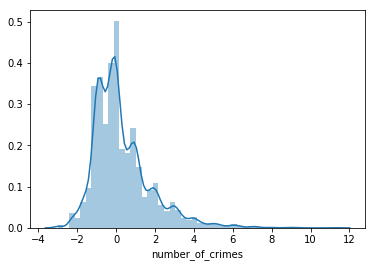

In [26]:
# investigate model metrics and examine distribution
predictions1=clf.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))
print('R2 score: ',r2_score(y_test,predictions1))
sns.distplot(y_test-predictions1)

In [27]:
from sklearn.ensemble import RandomForestRegressor

# fit random forest regression model
regr=RandomForestRegressor(max_depth=2, random_state=42)
regr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

MAE: 1.21427254701
MSE: 2.52735618518
RMSE: 1.58976607876
R2 score:  0.125679838133


/Users/michaeljoyce/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


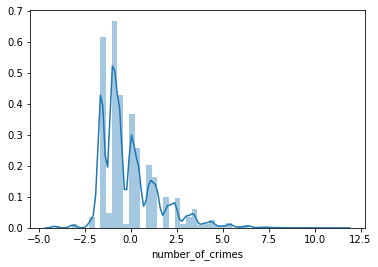

In [28]:
# investigate model metrics and examine distribution
predictions2=regr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions2))
print('MSE:', metrics.mean_squared_error(y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))
print('R2 score: ',r2_score(y_test,predictions2))
sns.distplot(y_test-predictions2)

In [29]:
from sklearn.ensemble import AdaBoostRegressor

In [30]:
ada=AdaBoostRegressor()

# fit adaptive boosting regression model
ada.fit(X_train, y_train)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

MAE: 1.52605954939
MSE: 3.26778779315
RMSE: 1.80770235192
R2 score:  -0.130466995117


/Users/michaeljoyce/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


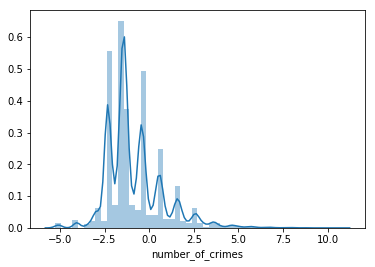

In [31]:
# investigate model metrics and examine distribution
predictions3=ada.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions3))
print('MSE:', metrics.mean_squared_error(y_test, predictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions3)))
print('R2 score: ',r2_score(y_test,predictions3))
sns.distplot(y_test-predictions3)

In [32]:
from sklearn.neural_network import MLPRegressor

# fit neural network regression model
mlp=MLPRegressor()
mlp.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

MAE: 1.05827191336
MSE: 2.23276466507
RMSE: 1.49424384391
R2 score:  0.227591593609


/Users/michaeljoyce/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


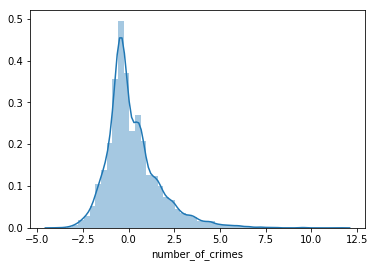

In [33]:
# investigate model metrics and examine distribution
predictions4=mlp.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions4))
print('MSE:', metrics.mean_squared_error(y_test, predictions4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions4)))
print('R2 score: ',r2_score(y_test,predictions4))
sns.distplot(y_test-predictions4)

In [34]:
from xgboost.sklearn import XGBRegressor

# fit extreme gradient boosting regression model
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

MAE: 1.06452170238
MSE: 2.10816751945
RMSE: 1.45195300181
R2 score:  0.270695053725


/Users/michaeljoyce/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


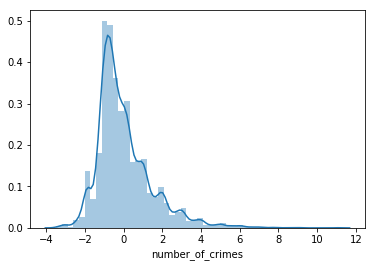

In [35]:
# investigate model metrics and examine distribution
predictions5=xgb.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions5))
print('MSE:', metrics.mean_squared_error(y_test, predictions5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions5)))
print('R2 score: ',r2_score(y_test,predictions5))
sns.distplot(y_test-predictions5)

In [36]:
# perform grid search for best parameters for XGBRegrssor

# from sklearn.grid_search import GridSearchCV

# # A parameter grid for XGBoost
# params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in [3,5]],  'subsample':[i/10.0 for i in [6,8,10]],
# 'colsample_bytree':[i/10.0 for i in [6,8,10]], 'max_depth': [2,4]}
# # Initialize XGB and GridSearch
# xgb = XGBRegressor(nthread=-1) 

# grid = GridSearchCV(xgb, params)
# grid.fit(X_train, y_train)

In [37]:
# fit optimal extreme gradient boosting regression model
xgb2=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
xgb2.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

MAE: 1.06452170238
MSE: 2.10816751945
RMSE: 1.45195300181
R2 score:  0.270695053725


/Users/michaeljoyce/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


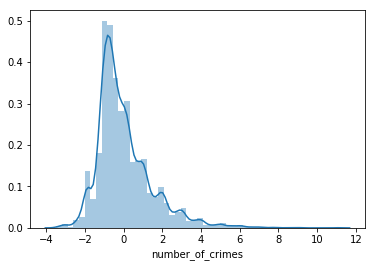

In [38]:
# investigate model metrics and examine distribution
predictions6=xgb2.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions6))
print('MSE:', metrics.mean_squared_error(y_test, predictions6))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions6)))
print('R2 score: ',r2_score(y_test,predictions6))
sns.distplot(y_test-predictions6)

In [39]:
# examine feature importance metrics from XGBRegression
coeff_df2=pd.DataFrame(xgb2.feature_importances_, X_columns, columns=['Coefficient'])
coeff_df2

,Coefficient
tmax,0.022857
tmin,0.010000
year,0.034286
month,0.008571
day,0.021429
consumer_price_index,0.192857
gdp_millions_2007,0.052857
seasonally_adjusted_unemployment,0.012857
unadjusted_unemployment,0.011429
"Possession, cocaine",0.002857
